In [4]:
!module load gcc/6.3.0 python_gpu/3.7.4 hdf5/1.10.1


Due to MODULEPATH changes, the following have been reloaded:
  1) jpeg/9b           3) openblas/0.2.19      5) r/3.5.1
  2) libpng/1.6.27     4) python_cpu/3.6.4

The following have been reloaded with a version change:
  1) gcc/4.8.5 => gcc/6.3.0



In [2]:
!pip install --user transformers

  Using cached https://files.pythonhosted.org/packages/37/ba/dda44bbf35b071441635708a3dd568a5ca6bf29f77389f7c7c6818ae9498/transformers-2.7.0-py3-none-any.whl
    100% |████████████████████████████████| 3.7MB 3.5MB/s eta 0:00:01    17% |█████▌                          | 645kB 11.0MB/s eta 0:00:01    34% |███████████                     | 1.3MB 13.3MB/s eta 0:00:01    84% |███████████████████████████▏    | 3.2MB 24.0MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/93/83/71a2ee6158bb9f39a90c0dea1637f81d5eef866e188e1971a1b1ab01a35a/filelock-3.0.12-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2a/5c/defec5286e293b5dedb757d1a51f3d342e8f098f2dae4134495471330687/boto3-1.12.36-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a6/b4/7a41d630547a4afd58143597d5a49e07bfd4c42914d8335b2a5657efc14b/sacremoses-0.0.38.tar.gz
    100% |████████████████████████████████| 61kB 5.4MB/s eta 0:00:01
    100% |███████████████████████████

In [2]:
import torch
from torch.utils import data
from transformers import AutoTokenizer, AutoModel
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from itertools import islice
import os
import json
from time import time
from collections import Counter
import numpy as np
import pandas as pd
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

text_path = 'data/preprocessed_text.json'

I0405 22:33:07.951047 46968493002176 file_utils.py:41] PyTorch version 1.4.0 available.


In [3]:
with open('data/preprocessed_text.json', 'r') as f:
    articles = json.load(f)
len(articles.keys())

33375

In [4]:
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [5]:
tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')
model = AutoModel.from_pretrained('allenai/scibert_scivocab_uncased')

I0405 22:33:16.568196 46968493002176 configuration_utils.py:282] loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/allenai/scibert_scivocab_uncased/config.json from cache at /cluster/home/cagomes/.cache/torch/transformers/199e28e62d2210c23d63625bd9eecc20cf72a156b29e2a540d4933af4f50bda1.79c4dd84b76a6991002b44cd58102c732c37aba834ad6401ddd6a89bd0ed809b
I0405 22:33:16.570364 46968493002176 configuration_utils.py:318] Model config BertConfig {
  "_num_labels": 2,
  "architectures": null,
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": null,
  "decoder_start_token_id": null,
  "do_sample": false,
  "early_stopping": false,
  "eos_token_id": null,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_decoder": false,
  "is_encoder_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    

In [57]:
tokenizer = AutoTokenizer.from_pretrained('deepset/covid_bert_base')
model = AutoModel.from_pretrained('deepset/covid_bert_base')

I0405 22:48:50.892128 46968493002176 configuration_utils.py:282] loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/deepset/covid_bert_base/config.json from cache at /cluster/home/cagomes/.cache/torch/transformers/227dc1f3377ab049cd65704a5ae537377a17e05ce90335665027e69fb4b27964.804ce9fd05d921b5f03e94cad964ec79867412490230d4f5c92b036968c16ef1
I0405 22:48:50.894167 46968493002176 configuration_utils.py:318] Model config BertConfig {
  "_num_labels": 2,
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": null,
  "decoder_start_token_id": null,
  "do_sample": false,
  "early_stopping": false,
  "eos_token_id": null,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_decoder": false,
  "is_encoder_decoder": false,
  "label2id": {
    "LAB

I0405 22:49:15.773950 46968493002176 file_utils.py:489] storing https://s3.amazonaws.com/models.huggingface.co/bert/deepset/covid_bert_base/pytorch_model.bin in cache at /cluster/home/cagomes/.cache/torch/transformers/5368c59872e76efc668918bcc2eca3b1c4295297965b4aacb13ef3be582e9e56.4f0eb07c9ea40465c550765993aae00095b4ea2010153be5e32dcb19197dce6c
I0405 22:49:15.776187 46968493002176 file_utils.py:492] creating metadata file for /cluster/home/cagomes/.cache/torch/transformers/5368c59872e76efc668918bcc2eca3b1c4295297965b4aacb13ef3be582e9e56.4f0eb07c9ea40465c550765993aae00095b4ea2010153be5e32dcb19197dce6c
I0405 22:49:15.779451 46968493002176 filelock.py:318] Lock 46971073284584 released on /cluster/home/cagomes/.cache/torch/transformers/5368c59872e76efc668918bcc2eca3b1c4295297965b4aacb13ef3be582e9e56.4f0eb07c9ea40465c550765993aae00095b4ea2010153be5e32dcb19197dce6c.lock
I0405 22:49:15.780557 46968493002176 modeling_utils.py:507] loading weights file https://s3.amazonaws.com/models.huggingfa

In [7]:
def cosine_similarity(first, second):
    with torch.no_grad():
        numerator = torch.dot(first, second)
        denominator = torch.norm(first) * torch.norm(second)
        return (numerator / denominator).item()

In [8]:
def sentence_embedding(sentence, average=False):
    encoded = tokenizer.encode(sentence, add_special_tokens=True)
    with torch.no_grad():
         output = model(torch.tensor([encoded]))
    if average:
        return output[0].squeeze().mean(axis=0)
    return output[0][:, 0, :].squeeze()

In [9]:
def sentence_similarity(first, second):
    return cosine_similarity(sentence_embedding(first), sentence_embedding(second))

In [10]:
sentence_similarity("What are the risk factors for the virus?", "Fever was one of the symptoms of the virus.")

0.7844191193580627

### Generate title embeddings OR just load them
Generation will take about 30 minutes

In [11]:
titles = [paper_json[1]['title'] for paper_json in articles.items()]
cropped_titles = []
for title in titles:
    dot_index = title.find(".")
    if dot_index == -1:
        cropped_titles.append(title)
    else:
        cropped_titles.append(title[0:dot_index + 1])
encoded = [tokenizer.encode(title, add_special_tokens=True) for title in cropped_titles]
padded = []
# get rid of titles longer than 30 tokens
max_length = 30
dropped = 0
indices_to_drop = []
for index, s in enumerate(encoded):
    if len(s) > 30:
        print("dropped " + titles[index])
        indices_to_drop.append(index)
        dropped += 1
        continue
    padded.append(s)
    for i in range(len(s), max_length):
        padded[-1].append(0)
for index in sorted(indices_to_drop, reverse=True):
    titles.pop(index)
    cropped_titles.pop(index)
print("Dropped {} titles".format(dropped))
padded_tensor = torch.tensor(padded)

dropped TWIRLS, an automated topic-wise inference method based on massive literature, suggests a possible mechanism via ACE2 for the pathological changes in the human host after coronavirus infection
dropped Nelfinavir was predicted to be a potential inhibitor of 2019-nCov main protease by an integrative approach combining homology modelling, molecular docking and binding free energy calculation
dropped Mono-ADP-ribosylation by ARTD10 restricts Chikungunya virus replication by interfering with the proteolytic activity of nsP2 2 3 4
dropped Artesunate interacts with Vitamin D receptor to reverse mouse model of sepsis-induced immunosuppression via enhancing autophagy Short running title: Artesunate reverses sepsis induced immunosuppression
dropped Full Title: Comparisons of a Novel Air Sampling Filter Material, Wash Buffers and 2 Extraction Methods in the Detection and Quantification of Influenza Virus 3 Short title: Comparisons of Air Sampling Filter Materials for the Detection Quantifi

dropped Metagenomic analysis of viromes of dromedary camel fecal samples reveals large number and high diversity of circoviruses and picobirnaviruses
dropped Novel platinum(II) and palladium(II) complexes of thiosemicarbazones derived from 5-substitutedthiophene-2-carboxaldehydes and their antiviral and cytotoxic activities
dropped Journal Pre-proof Strategies for qualified triage stations and fever clinics during the outbreak of COVID-2019 in the county hospitals of Western Chongqing
dropped Comparative analysis of virus-specific antibodies and immunoglobulins in serum and cerebrospinal fluid of subacute measles virus-induced encephalomyelitis (SAME) in rats and subacute sclerosing panencephalitis (SSPE)
dropped Bilan français des effets indésirables du vaccin Prévenar 13 W Post-licensure safety surveillance for Prevenar 13 W in France ScienceDirect
dropped TWICE MONTHLY BlBLlOCRAPHY ON NEUROPEPTIDES -EARLY JANUARY PREPARED BY SUBIS, 1 NORTHUMBERLAND ROAD, SHEFFIELD SlO 2l-l' 1. BOORS

dropped ERKs and mitochondria-related pathways are essential for glycyrrhizic acid-mediated neuroprotection against glutamate-induced toxicity in differentiated PC12 cells
dropped Assessment of the ability of V920 recombinant vesicular stomatitis-Zaire ebolavirus vaccine to replicate in relevant arthropod cell cultures and vector species
dropped Human-livestock contacts and their relationship to transmission of zoonotic pathogens, a systematic review of literature-NC-ND license (http://creativecommons.org/licenses/by-nc-nd/4.0/)
dropped Reduction of influenza virus-induced lung inflammation and mortality in animals treated with a phosophodisestrase-4 inhibitor and a selective serotonin reuptake inhibitor
dropped Increase in Middle East Respiratory Syndrome-Coronavirus Cases in Saudi Arabia Linked to Hospital Outbreak With Continued Circulation of Recombinant Virus, July 1-August 31, 2015
dropped A Transfected Sialyltransferase That Is Elevated in Breast Cancer and Localizes to the medi

#### Generate

In [74]:
title_generator = data.DataLoader(padded_tensor[:1024], batch_size=256, num_workers=4)
embeddings = torch.zeros(padded_tensor.shape[0], 768)
with torch.no_grad():
    cur_index = 0
    for batch in title_generator:
        print(cur_index)
        cur_index += 256
        output = model(batch)
        embeddings[cur_index - 256: cur_index] = output[0][:, 0, :]

0
256
512
768


In [17]:
torch.save(embeddings, "embeddings.pt")

#### Load

In [12]:
embeddings = torch.load("embeddings.pt")

In [78]:
encoded_query = tokenizer.encode("Diabetics and athsma risk factors", add_special_tokens=True)
for i in range(len(encoded_query), max_length):
    encoded_query.append(0)
query_tensor = torch.tensor([encoded_query])
with torch.no_grad():
    query_output = model(query_tensor)
query_embedding = query_output[0][:, 0, :]

In [79]:
similarity = F.cosine_similarity(embeddings, query_embedding)
index_sorted = torch.argsort(similarity, descending=True)
relevant = [titles[i] for i in index_sorted.tolist()[:20]]

In [80]:
relevant

['COVID-19 Myocarditis and Severity Factors： An Adult Cohort Study Authors',
 'A data-driven assessment of early travel restrictions related to the spreading of the novel COVID-19 within mainland China',
 'Chronic infections can shape epidemic exposure: Pathogen co-occurrence networks in the Serengeti lions',
 'Extended SIR prediction of the epidemics trend of COVID-19 in Italy and compared with Hunan, China',
 'Clinical Characteristics of SARS-CoV-2 Pneumonia Compared to Controls in Chinese Han Population',
 'A simple model to assess Wuhan lock-down effect and region efforts during COVID-19 epidemic in China Mainland',
 'Large-scale analysis of redox-sensitive conditionally disordered protein regions reveal their widespread nature and key roles in high-level eukaryotic processes',
 'Evaluating the accuracy of different respiratory specimens in the laboratory diagnosis and monitoring the viral shedding of 2019-nCoV infections',
 'Bulk and single-cell transcriptomics identify tobacco-us

In [82]:
embeddings_np = embeddings.numpy()
centered = embeddings_np - embeddings_np.mean(axis=0)
pca = PCA(n_components=50)
components = pca.fit_transform(centered)
tsne = TSNE()
result = tsne.fit_transform(components)

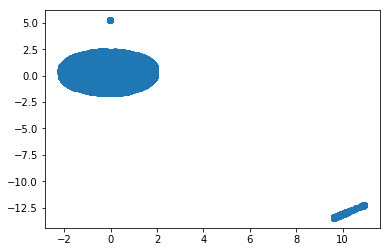

In [83]:
plt.scatter(result[:, 0], result[:, 1])